In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [2]:
cd 'drive/My Drive/Colab Notebooks/matrix/matrix'

/content/drive/My Drive/Colab Notebooks/matrix/matrix


In [3]:
ls data/

men_shoes.csv


In [5]:
df=pd.read_csv("data/men_shoes.csv",low_memory=False)
df.shape

(18280, 48)

In [6]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [8]:
mean_price=np.mean(df.prices_amountmin)
mean_price

93.53952188183217

## error from mean

In [19]:
y_true=df.prices_amountmin
y_true.shape

y_pred=[mean_price]*y_true.shape[0]

mean_absolute_error(y_true,y_pred)

63.968341227870624

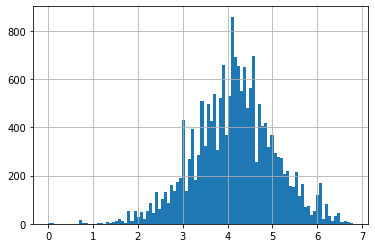

In [21]:
np.log1p(df.prices_amountmin).hist(bins=100)

In [22]:
#median
y_pred2=[np.median(y_true)]*y_true.shape[0]

mean_absolute_error(y_true,y_pred2)

58.01120240700219

In [26]:
#log
price_log_mean = np.mean(np.log1p(y_true))
price_log_mean_exp=np.expm1(price_log_mean)

y_pred3=[price_log_mean_exp]*y_true.shape[0]

mean_absolute_error(y_true,y_pred3)

58.03539547661041

## Decision tree

In [0]:
df['brand_cat']=df.brand.factorize()[0]

In [36]:
feats=['brand_cat']
X=df[feats].values
y=df['prices_amountmin'].values

model=DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
feats=['brand_cat']
def run_model(feats):
  X=df[feats].values
  y=df['prices_amountmin'].values

  model=DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [43]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [0]:
df['prices_condition_cat']=df.prices_condition.factorize()[0]

In [0]:
df['prices_issale_cat']=df.prices_issale.factorize()[0]

In [0]:
df['categories_cat']=df.categories.factorize()[0]

In [0]:
df['prices_offer_cat']=df.prices_offer.factorize()[0]

In [71]:
run_model(['categories_cat','brand_cat','prices_condition_cat','prices_issale_cat'])

(-56.86014515740645, 1.8573044975270119)

In [0]:
!git add day3pawel.ipynb